<a href="https://colab.research.google.com/github/edypj/Visualisasi-Data/blob/main/Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

Assignments

    Deadline: 2 September 2024
    Contact Email: afia@ugm.ac.id
    Job Description: To be provided by each group member

Task Instructions:

    1. Download the dataset: Hepatitis C dataset from the link here.
    2. Divide the dataset into 3 parts: training data, validation data, and test data.
    3. Design and build an ANN model: Experiment with different types of models (Shallow, Deep, Hybrid, etc.).
    4. Perform parameter tuning to obtain the best model.
    5. Display the loss graph for training and validation to analyze overfitting.
    6. Apply strategies to handle overfitting (such as regularization, dropout, etc.).
    7. Show the confusion matrix and the accuracy of the test data.

# Datasets

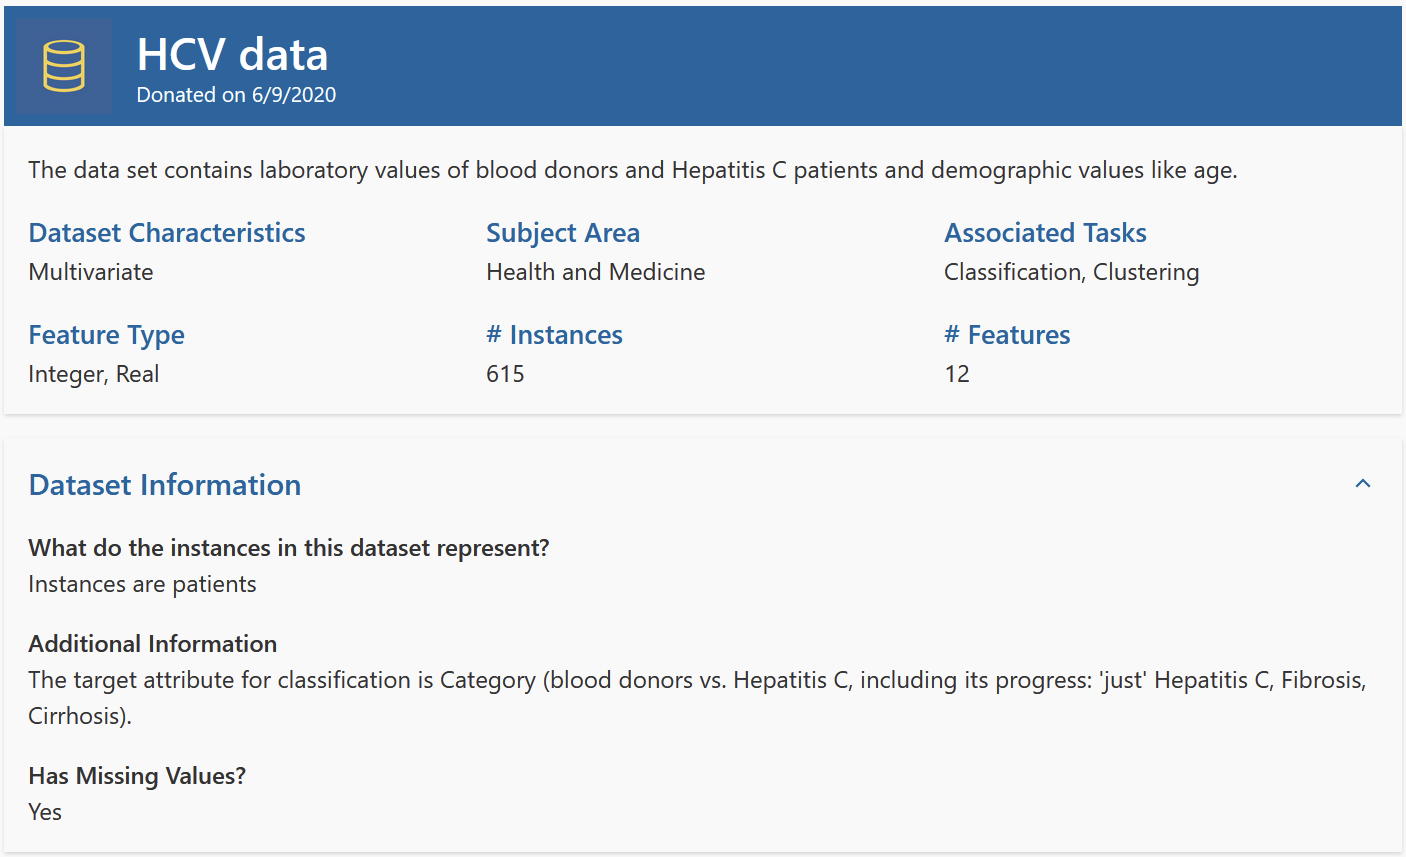

In [5]:
# Import necessary libraries
import requests
import zipfile
import os

# URL of the dataset
url = "https://archive.ics.uci.edu/static/public/571/hcv+data.zip"
zip_file = "hcv_data.zip"

# Download the dataset
print("Downloading dataset...")
response = requests.get(url)
with open(zip_file, "wb") as file:
    file.write(response.content)
print("Download completed.")

# Extract the ZIP file
print("Extracting the dataset...")
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("hcv_data")
print("Extraction completed.")

# List the files in the extracted folder
print("Files in the extracted folder:")
os.listdir("hcv_data")


Download completed.
Extracting the dataset...
Extraction completed.
Files in the extracted folder:


['hcvdat0.csv']

In [12]:
import pandas as pd

file_path = "hcv_data/hcvdat0.csv"  # Ganti 'nama_file.csv' dengan nama file yang benar
data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari dataset
print(data.head())


   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [13]:
# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB
None


<Axes: >

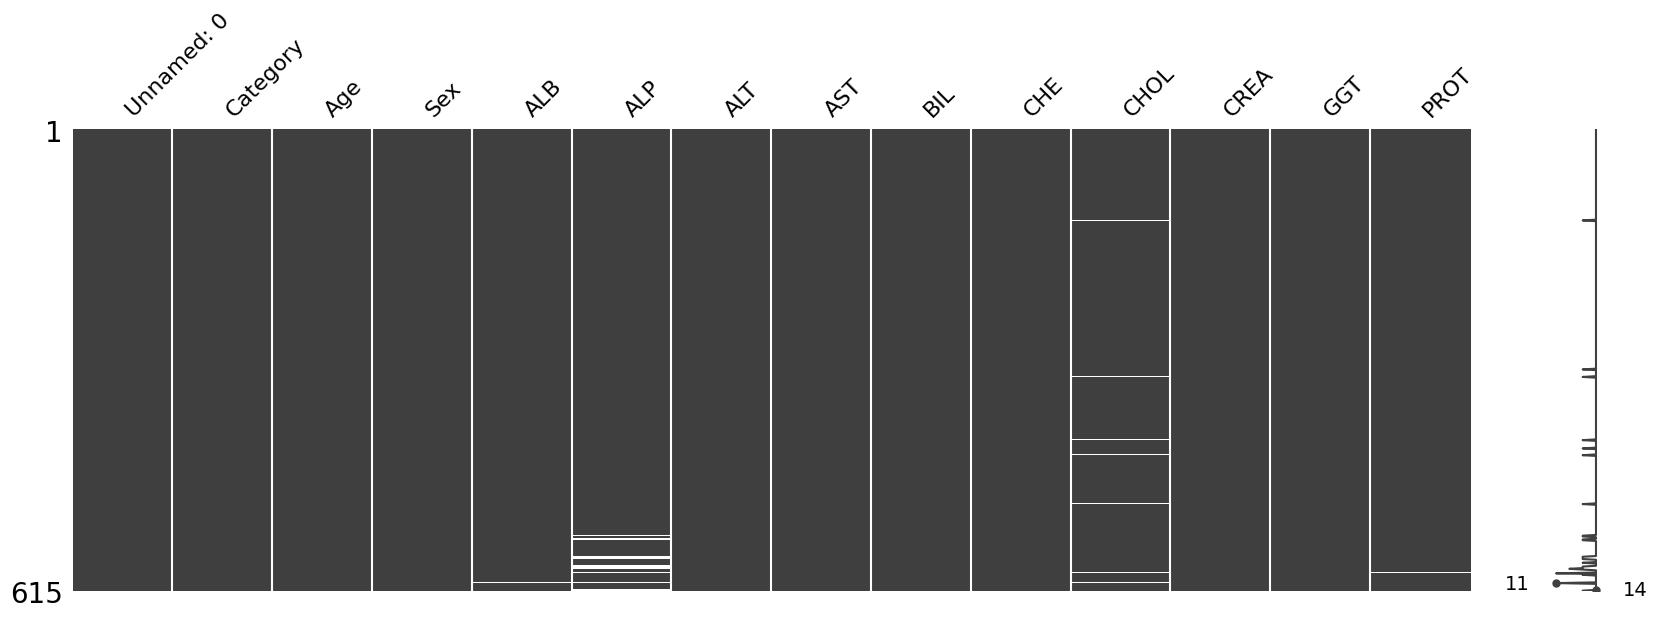

In [14]:
import missingno as mno

# Membuat visualisasi matriks missing data
mno.matrix(data, figsize=(20, 6))


<Axes: >

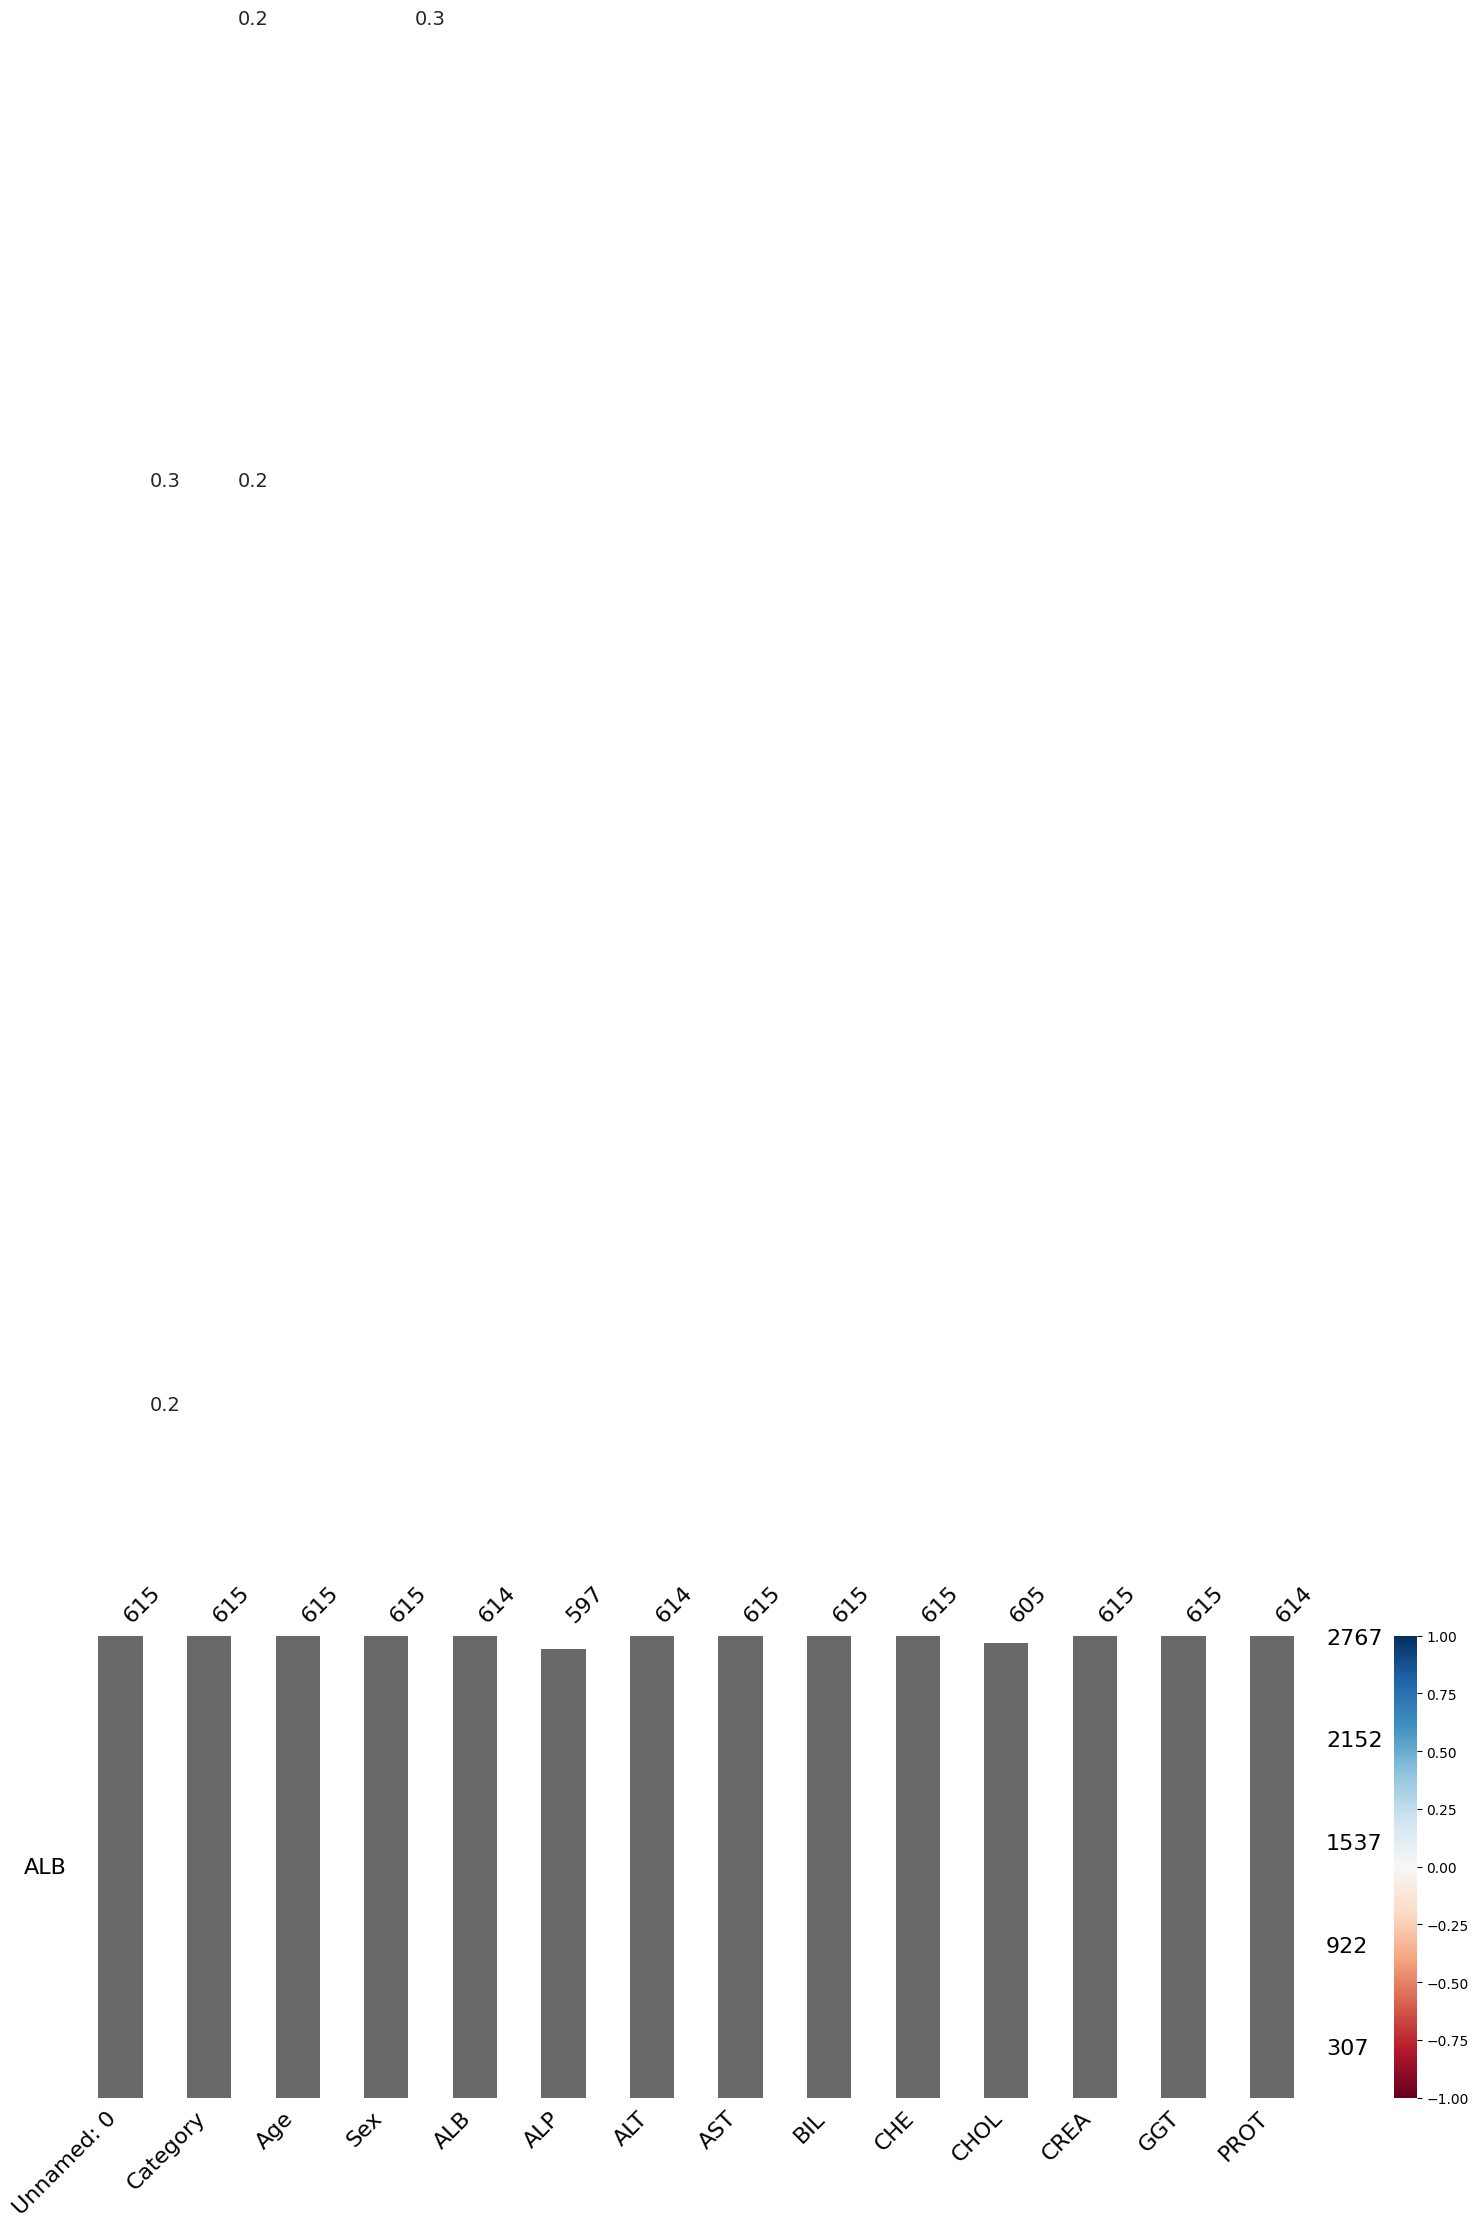

In [15]:
# Menampilkan heatmap untuk melihat korelasi antara missing values
mno.heatmap(data, figsize=(20, 6))

# Menampilkan bar plot dari missing values
mno.bar(data, figsize=(20, 6))


<Axes: >

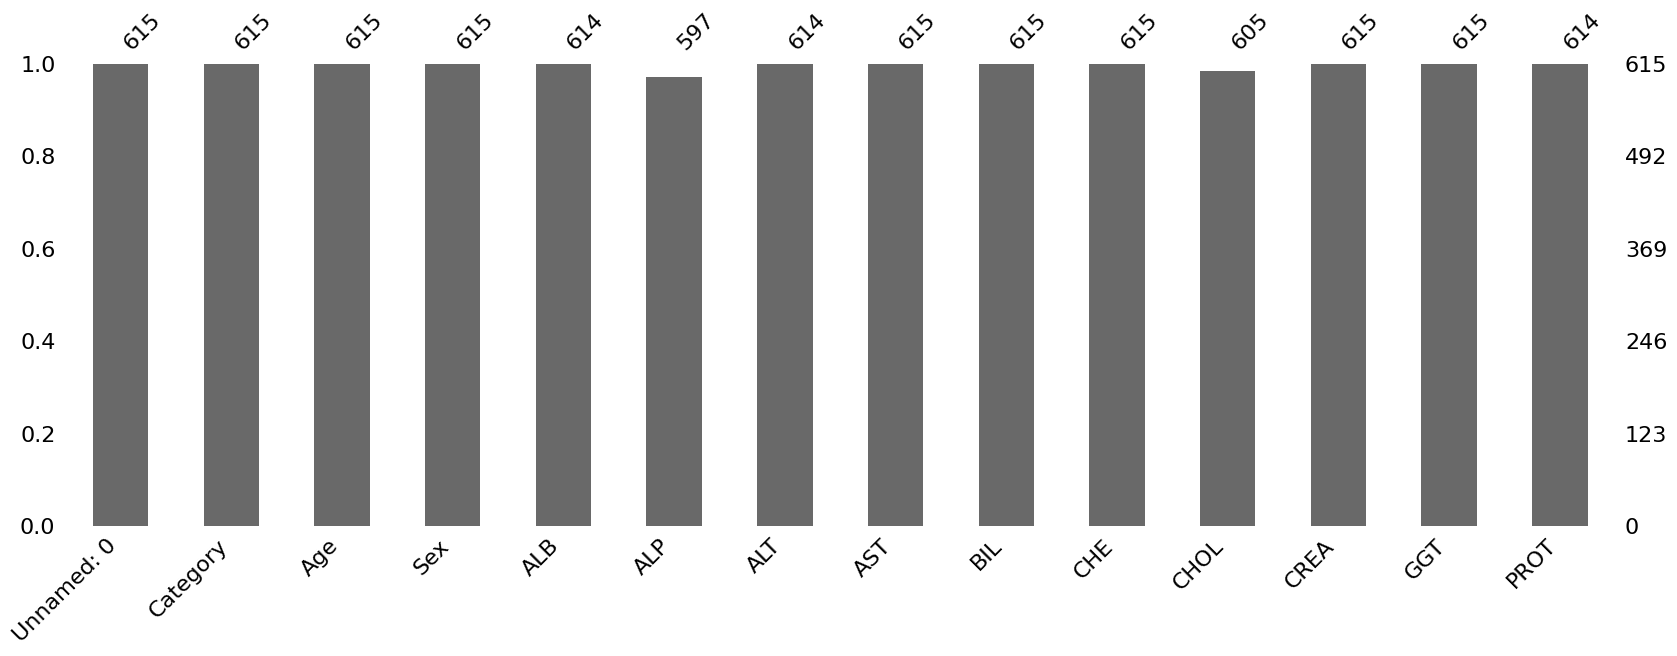

In [16]:
# Menampilkan bar plot dari missing data
import missingno as mno

mno.bar(data, figsize=(20, 6))


<Axes: >

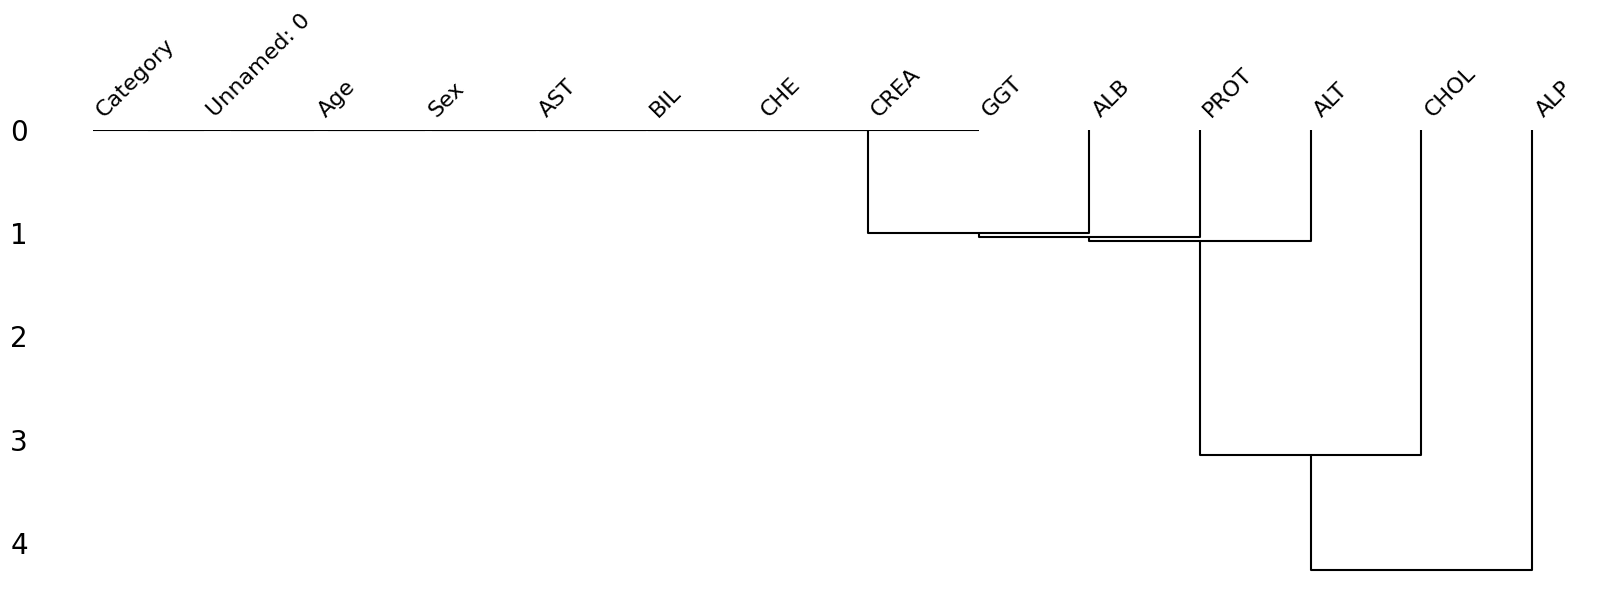

In [17]:
# Menampilkan dendrogram dari missing data
mno.dendrogram(data, figsize=(20, 6))


In [18]:
# Menghapus baris yang memiliki missing values
data_cleaned = data.dropna(axis=0)

# Menampilkan ukuran dataset setelah penghapusan
print("Ukuran dataset setelah menghapus baris dengan missing values:", data_cleaned.shape)

# Menampilkan beberapa baris pertama dari dataset yang telah dibersihkan
print(data_cleaned.head())


Ukuran dataset setelah menghapus baris dengan missing values: (589, 14)
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [19]:
# Menyimpan dataset yang telah dibersihkan
data_cleaned.to_csv("hcvdat_cleaned.csv", index=False)


Sebelum Dibersihkan:
Sesudah Dibersihkan:


<Axes: >

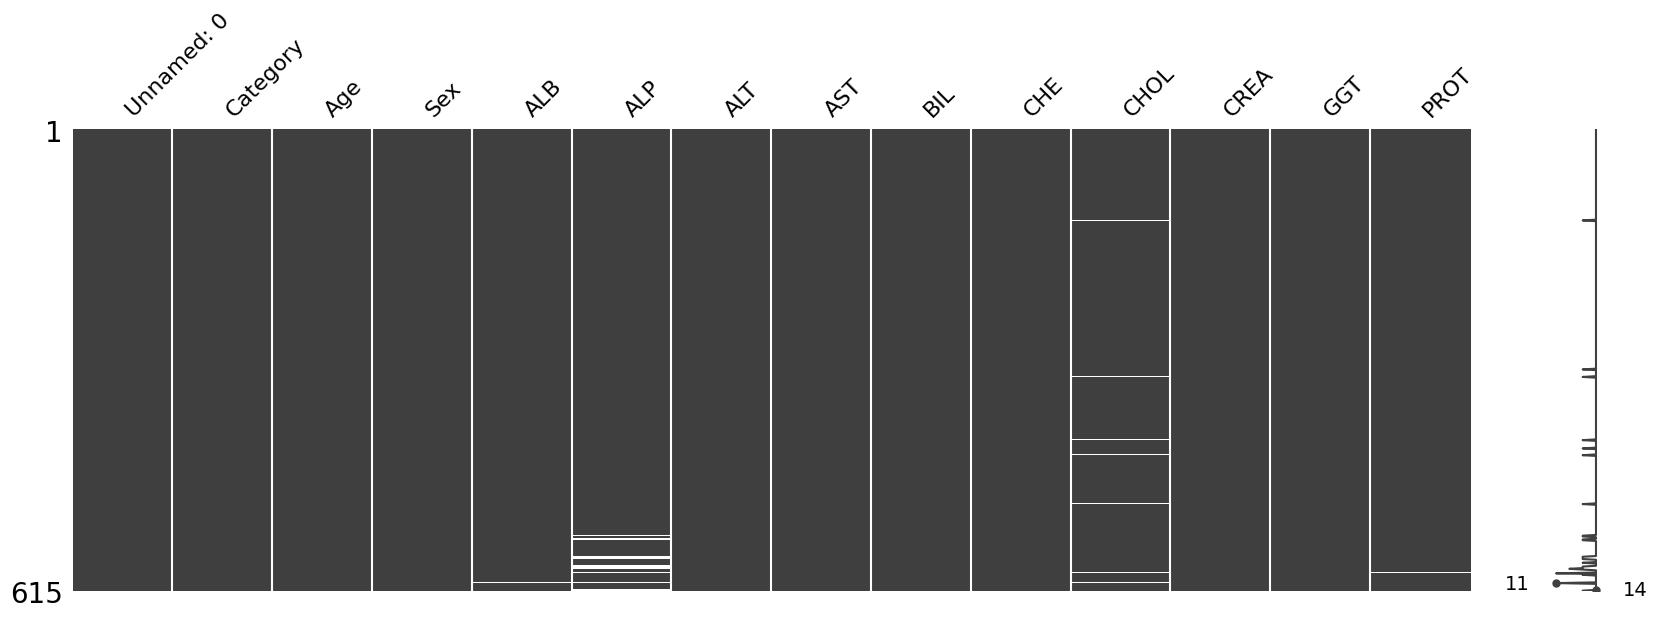

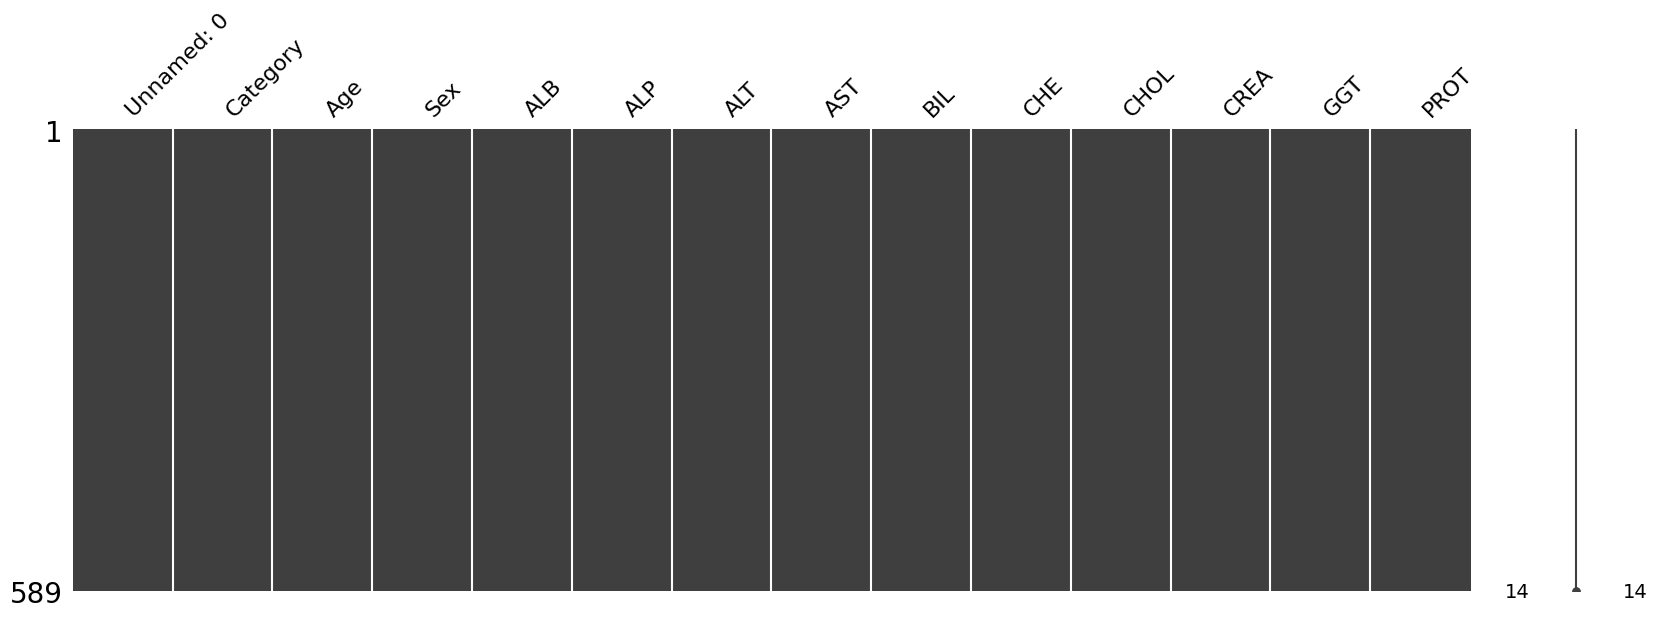

In [24]:
# Membuat visualisasi matriks missing data
print("Sebelum Dibersihkan:")
mno.matrix(data, figsize=(20, 6))
print("Sesudah Dibersihkan:")
# Membuat visualisasi matriks missing data
mno.matrix(data_cleaned, figsize=(20, 6))

# Exploratory Data Analysis (EDA)

In [25]:
# Menampilkan statistik deskriptif
print(data_cleaned.describe())


       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  589.000000  589.000000  589.000000  589.000000  589.000000  589.000000   
mean   298.648557   47.417657   41.624278   68.123090   26.575382   33.772835   
std    174.142507    9.931334    5.761794   25.921072   20.863120   32.866871   
min      1.000000   23.000000   14.900000   11.300000    0.900000   10.600000   
25%    149.000000   39.000000   38.800000   52.500000   16.400000   21.500000   
50%    296.000000   47.000000   41.900000   66.200000   22.700000   25.700000   
75%    448.000000   54.000000   45.100000   79.900000   31.900000   31.700000   
max    613.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  589.000000  589.000000  589.000000   589.000000  589.000000  589.000000  
mean    11.018166    8.203633    5.391341    81.669100   38.198472   71.890153  
std     17.406572    2.1910

In [26]:
# Menampilkan distribusi frekuensi dari kolom kategorikal
print(data_cleaned['Category'].value_counts())
print(data_cleaned['Sex'].value_counts())


Category
0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: count, dtype: int64
Sex
m    363
f    226
Name: count, dtype: int64


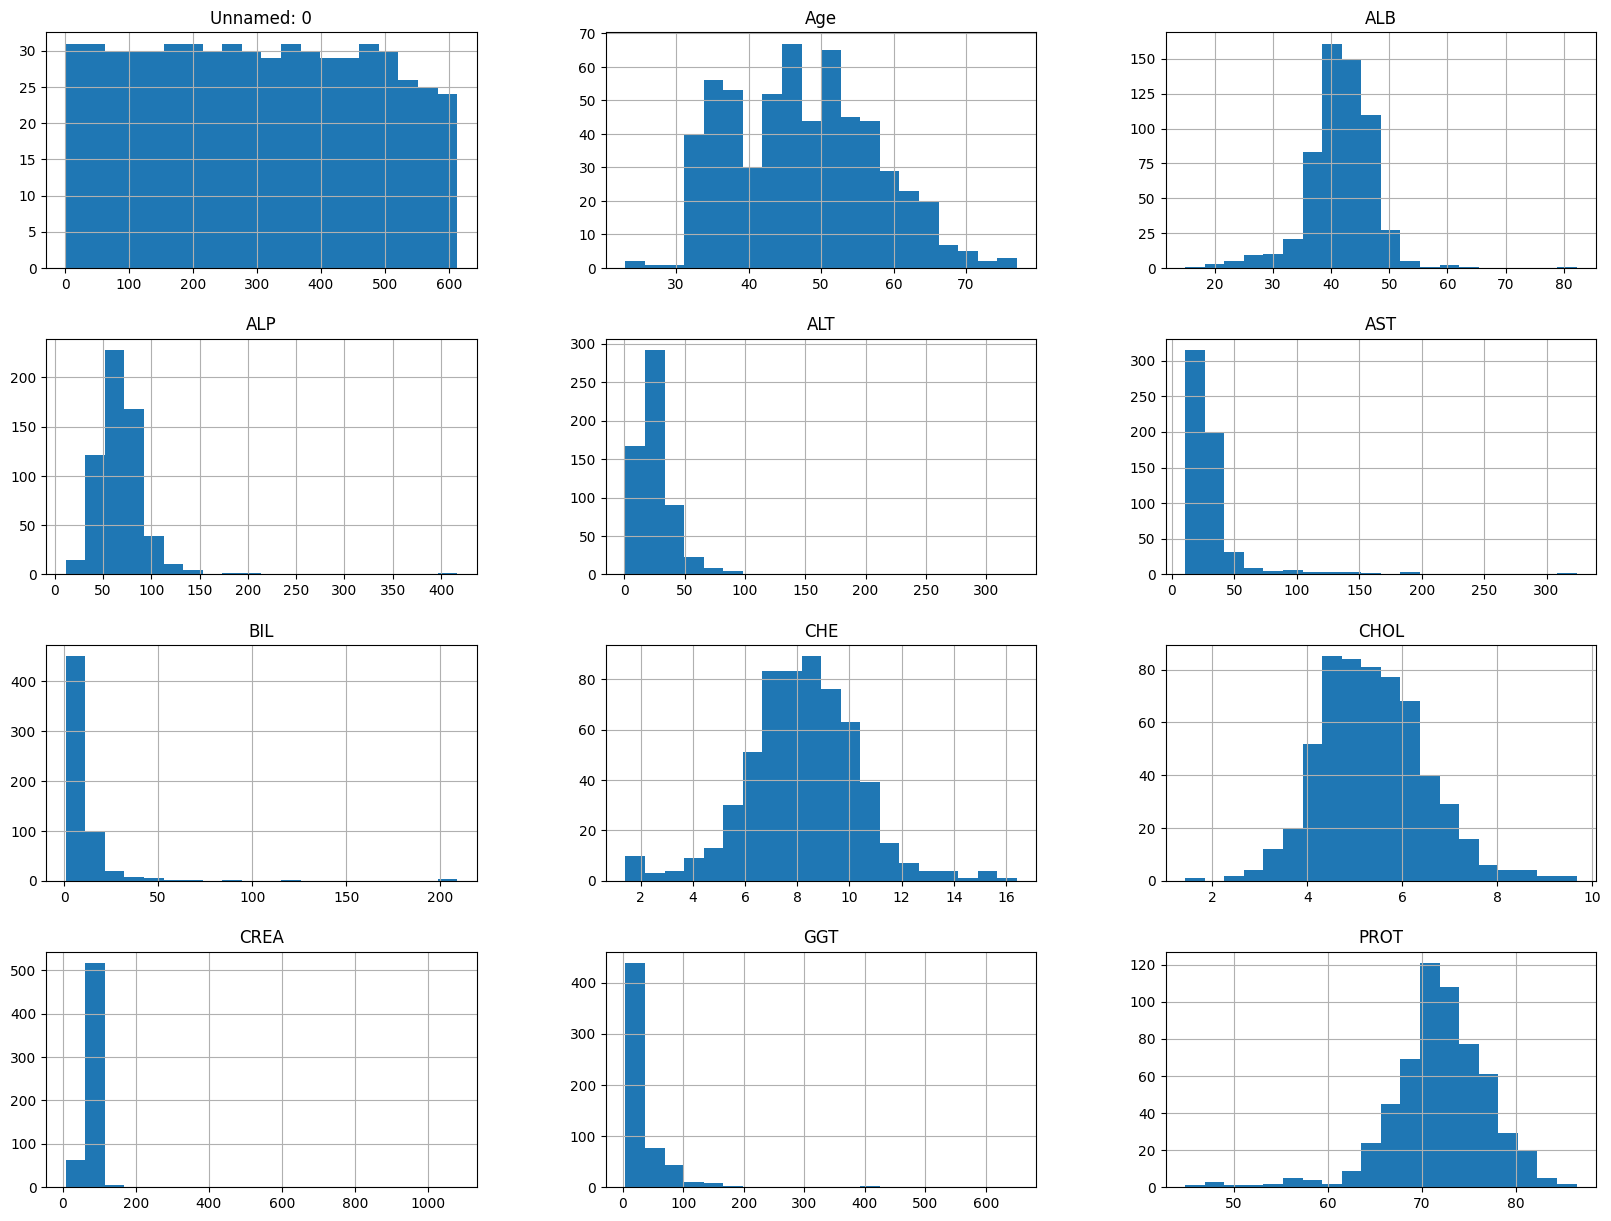

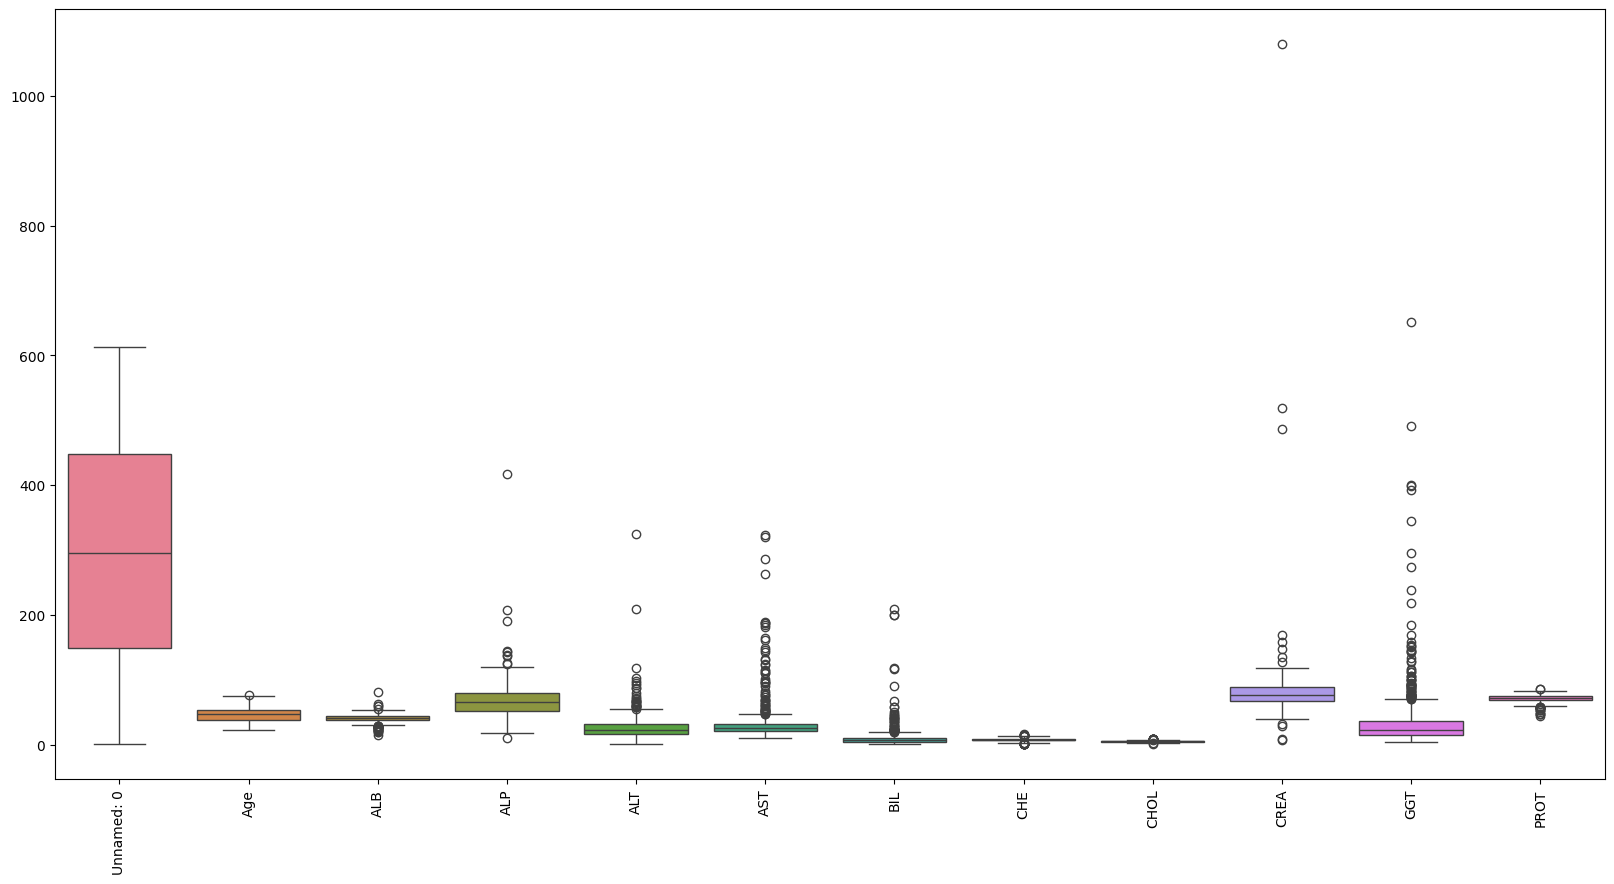

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk distribusi variabel numerik
data_cleaned.hist(bins=20, figsize=(20, 15))
plt.show()

# Boxplot untuk melihat outlier dalam variabel numerik
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_cleaned)
plt.xticks(rotation=90)
plt.show()


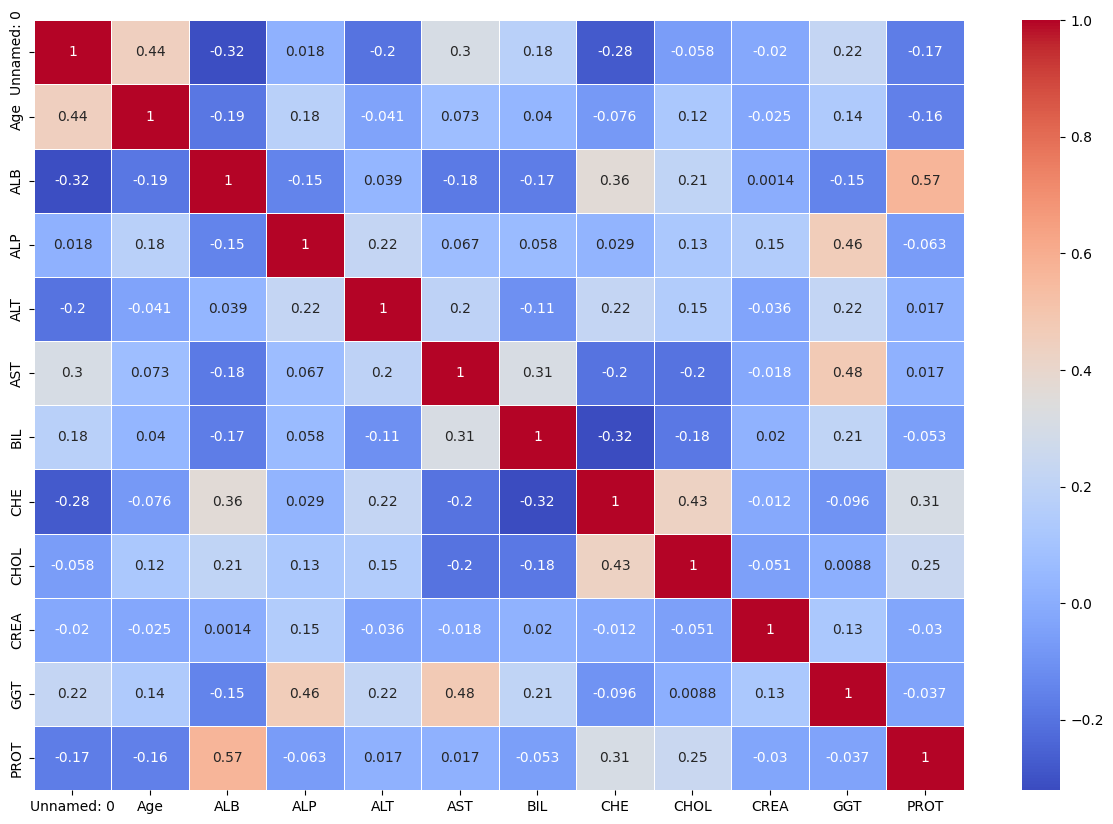

In [29]:
# Memilih hanya kolom numerik dari dataset
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi hanya untuk kolom numerik
corr_matrix = numeric_data.corr()

# Visualisasi matriks korelasi menggunakan heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


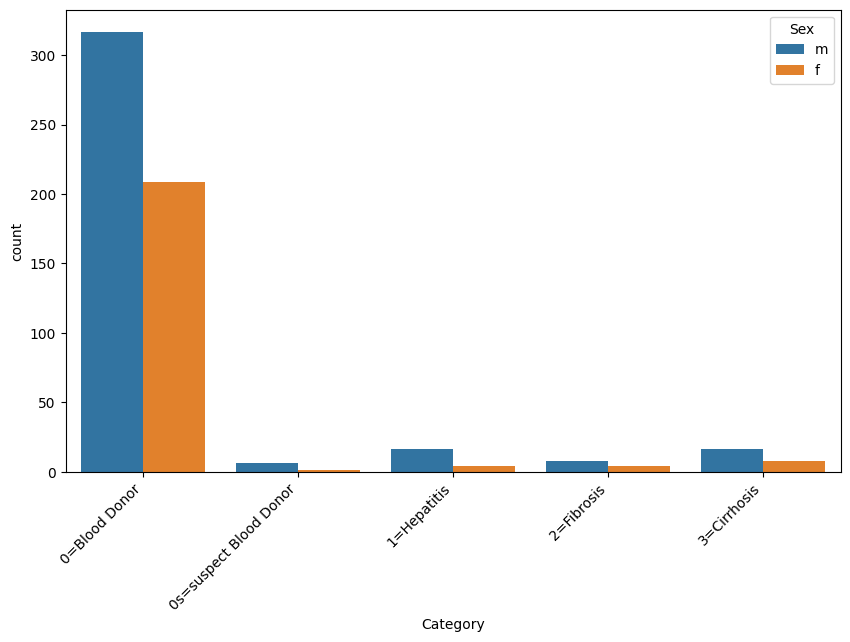

In [36]:
# Menggunakan countplot untuk melihat distribusi dengan jarak antar kategori
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Sex', data=data_cleaned, dodge=True)

# Mengatur jarak antar label pada sumbu x agar tidak saling bertumpukan
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.show()


# Data Checking


In [37]:
# Mengecek missing values
missing_values = data_cleaned.isnull().sum()

# Menampilkan kolom yang memiliki missing values
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Jika tidak ada missing values, akan ditampilkan pesan bahwa data sudah bersih
if missing_values.sum() == 0:
    print("Data sudah bersih dari missing values!")
else:
    print("Masih ada missing values di beberapa kolom.")


Missing values per column:
Series([], dtype: int64)
Data sudah bersih dari missing values!


In [38]:
# Mengecek duplikasi baris
duplicate_rows = data_cleaned.duplicated().sum()

if duplicate_rows > 0:
    print(f"Ada {duplicate_rows} baris duplikat dalam dataset.")
else:
    print("Tidak ada baris duplikat dalam dataset.")


Tidak ada baris duplikat dalam dataset.


In [39]:
# Mengecek nilai yang tidak masuk akal (contoh: umur negatif)
invalid_values = (data_cleaned['Age'] < 0).sum()

if invalid_values > 0:
    print(f"Ada {invalid_values} nilai 'Age' yang tidak masuk akal (negatif).")
else:
    print("Semua nilai 'Age' masuk akal.")


Semua nilai 'Age' masuk akal.


In [40]:
# Mengecek tipe data setiap kolom
print("Tipe data setiap kolom:")
print(data_cleaned.dtypes)

# Mengecek apakah ada kolom yang seharusnya numerik tapi bertipe object
numerical_columns = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
for col in numerical_columns:
    if data_cleaned[col].dtype == 'object':
        print(f"Kolom {col} seharusnya numerik tapi bertipe object.")


Tipe data setiap kolom:
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object


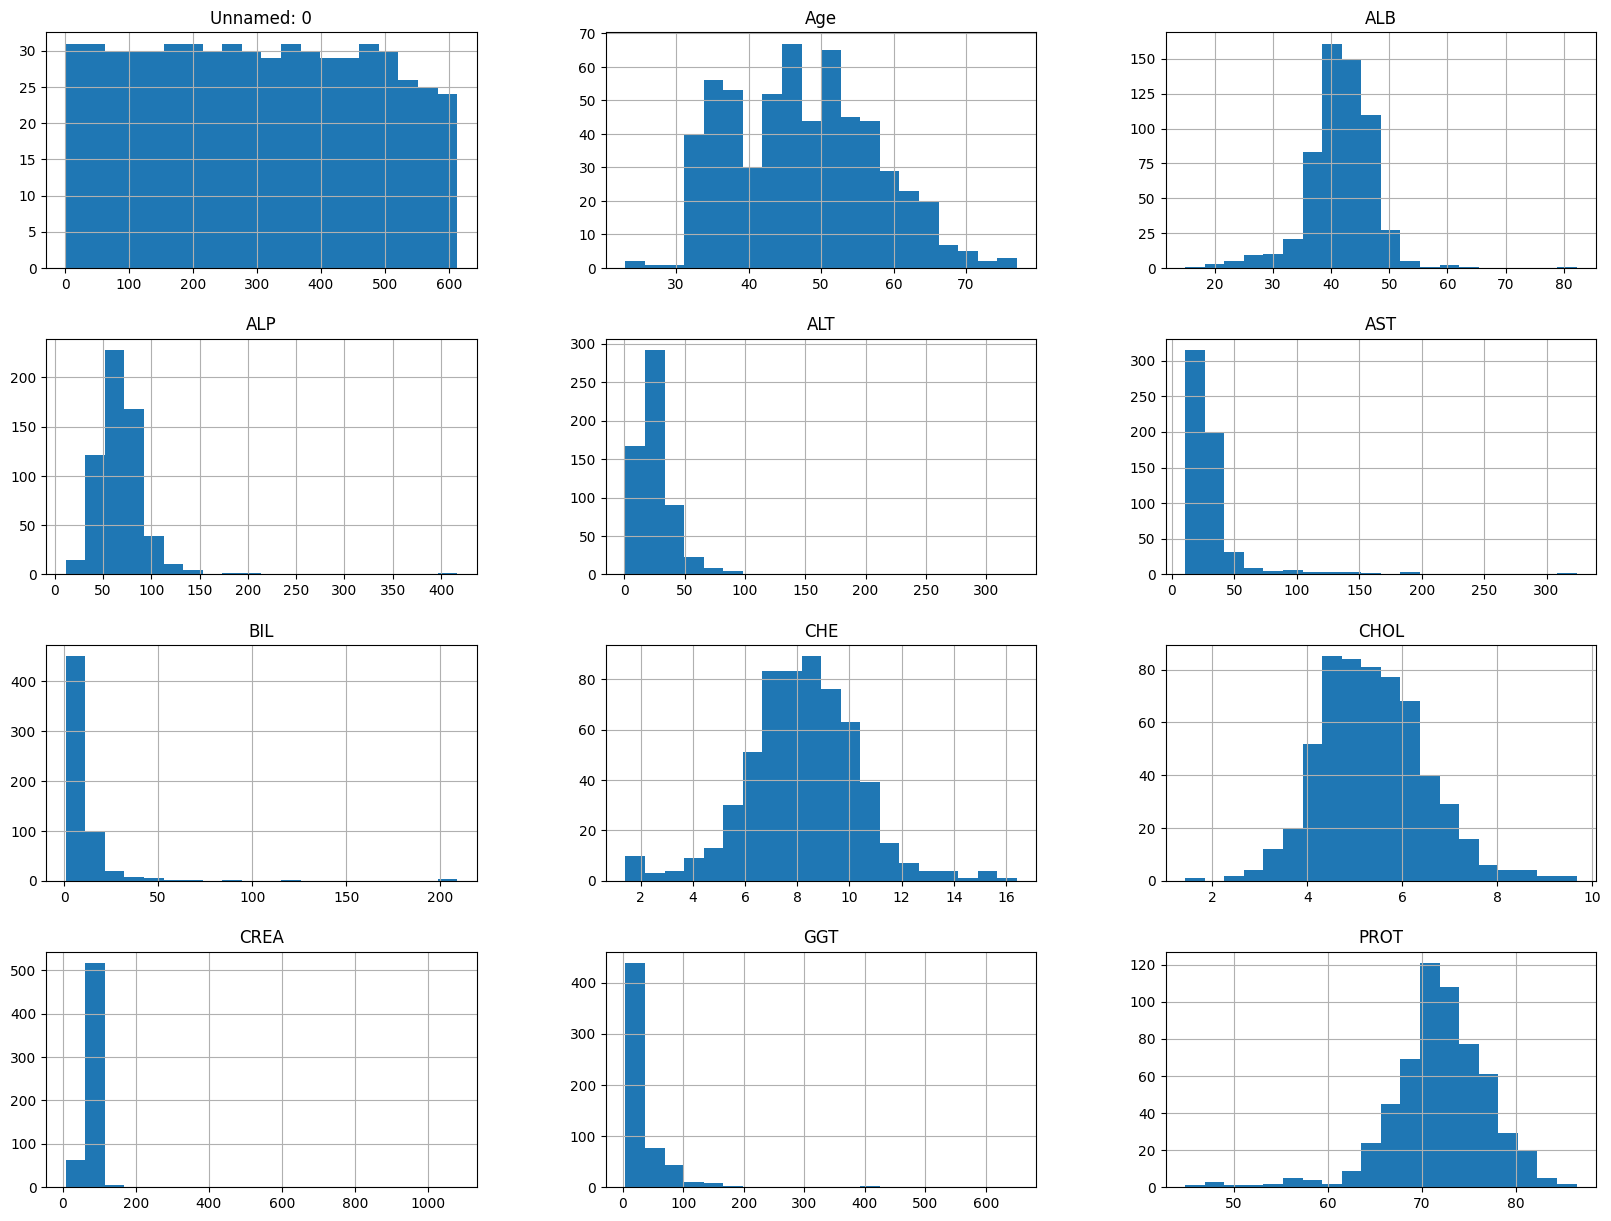

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram untuk mengecek distribusi data
data_cleaned.hist(bins=20, figsize=(20, 15))
plt.show()


In [42]:
# Mengecek konsistensi dalam kolom kategorikal
print("Unique values in 'Category':")
print(data_cleaned['Category'].unique())

print("Unique values in 'Sex':")
print(data_cleaned['Sex'].unique())


Unique values in 'Category':
['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
Unique values in 'Sex':
['m' 'f']


In [49]:
#data_cleaned = data_cleaned.drop(columns=['Unnamed: 0'])
# Menampilkan lima baris pertama dari dataset yang sudah dibersihkan
print(data_cleaned.head())

# Menampilkan informasi umum tentang dataset yang sudah dibersihkan
print(data_cleaned.info())


        Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
3  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
0  12.1  69.0  
1  15.6  76.5  
2  33.2  79.3  
3  33.8  75.7  
4  29.9  68.7  
<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    object 
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    object 
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       58

In [50]:
from scipy import stats
import numpy as np

# Menghitung Z-Score untuk semua kolom numerik
z_scores = np.abs(stats.zscore(data_cleaned.select_dtypes(include=['float64', 'int64'])))

# Menampilkan outlier jika Z-Score lebih dari 3
print("Outliers berdasarkan Z-Score:")
print(np.where(z_scores > 3))


Outliers berdasarkan Z-Score:
(array([ 23,  27,  45,  64,  65,  89, 108, 114, 124, 125, 182, 204, 204,
       208, 215, 230, 234, 258, 343, 379, 402, 502, 526, 526, 527, 528,
       528, 529, 529, 530, 530, 531, 531, 531, 532, 532, 532, 532, 532,
       532, 533, 534, 542, 544, 546, 547, 547, 547, 548, 557, 561, 565,
       566, 567, 569, 570, 570, 571, 572, 572, 573, 574, 574, 574, 575,
       575, 577, 578, 578, 579, 579, 580, 581, 582, 582, 584, 585, 586,
       586, 587, 587]), array([ 3, 10,  3,  3,  3,  7,  6,  3,  7,  4,  6,  7,  9,  6,  1,  7,  6,
        1,  1,  7,  1, 10,  1,  9, 10,  1, 10,  3,  6,  1, 10,  1,  9, 10,
        1,  2,  3,  4,  9, 10,  4,  4,  7,  6,  4,  4,  5,  9,  9,  4,  4,
        8,  5,  4,  8,  4,  9,  5,  4,  6,  1,  5,  7, 10,  4,  9,  5,  5,
        6,  4,  9,  1,  5,  2,  8,  4,  4,  2,  9,  1,  6]))


In [51]:
# Menampilkan baris dan kolom yang memiliki outliers berdasarkan Z-Score
outlier_rows = np.unique(np.where(z_scores > 3)[0])  # Mengambil indeks baris unik
outlier_data = data_cleaned.iloc[outlier_rows]

print("Data yang mengandung outliers:")
print(outlier_data)


Data yang mengandung outliers:
                   Category  Age Sex   ALB    ALP    ALT    AST    BIL    CHE  \
23            0=Blood Donor   34   m  43.4   46.1   97.8   46.2   11.3   7.99   
27            0=Blood Donor   34   m  29.0   41.6   29.1   16.1    4.8   6.82   
45            0=Blood Donor   36   m  41.7   77.2  103.6   46.9   10.4  12.21   
64            0=Blood Donor   37   m  33.9   64.0   91.7   44.7    9.1   8.35   
65            0=Blood Donor   37   m  42.9   61.8   96.1   44.1    9.6   7.82   
89            0=Blood Donor   39   m  46.4  102.9   44.4   26.2    4.1   9.29   
108           0=Blood Donor   42   m  45.3   55.3   31.0   50.0   18.5  15.43   
114           0=Blood Donor   42   m  46.9   68.7  118.1   49.3   20.2   7.93   
125           0=Blood Donor   43   m  42.8   76.9   57.7   33.0   11.3   9.63   
126           0=Blood Donor   43   m  43.9   40.7   35.8  188.7    8.7   7.70   
183           0=Blood Donor   48   m  42.6   69.1   17.6   28.3    7.7  15.40 

In [52]:
# Melihat nilai unik dalam kolom Category
print("Kategori yang ada dalam kolom 'Category':")
print(data_cleaned['Category'].value_counts())


Kategori yang ada dalam kolom 'Category':
Category
0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: count, dtype: int64


# Data Prepare

In [53]:
# Pisahkan fitur dan target
X = data_cleaned.drop(columns=['Category'])
y = data_cleaned['Category']


In [54]:
from sklearn.preprocessing import LabelEncoder

# Mengubah target menjadi format numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menampilkan mapping label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping Label:")
print(label_mapping)


Mapping Label:
{'0=Blood Donor': 0, '0s=suspect Blood Donor': 1, '1=Hepatitis': 2, '2=Fibrosis': 3, '3=Cirrhosis': 4}


In [55]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [57]:

# Mengonversi kolom kategorikal menjadi variabel dummy (one-hot encoding)
X_encoded = pd.get_dummies(X, columns=['Sex'])

# Memeriksa hasilnya
print(X_encoded.head())

   Age   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT  Sex_f  \
0   32  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0  False   
1   32  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5  False   
2   32  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3  False   
3   32  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7  False   
4   32  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7  False   

   Sex_m  
0   True  
1   True  
2   True  
3   True  
4   True  


In [58]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Normalisasi fitur
X_train_scaled = scaler.fit_transform(X_encoded.loc[X_train.index])
X_test_scaled = scaler.transform(X_encoded.loc[X_test.index])


In [59]:
from tensorflow.keras.utils import to_categorical

# Mengubah target menjadi one-hot encoded format
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)


In [60]:
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of y_train (one-hot):", y_train_oh.shape)
print("Shape of X_test:", X_test_scaled.shape)
print("Shape of y_test (one-hot):", y_test_oh.shape)


Shape of X_train: (471, 13)
Shape of y_train (one-hot): (471, 5)
Shape of X_test: (118, 13)
Shape of y_test (one-hot): (118, 5)


In [61]:
from sklearn.utils import class_weight
import numpy as np

# Menghitung class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

# Mengubah class_weights menjadi dictionary
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)


Class Weights: {0: 0.22375296912114015, 1: 15.7, 2: 5.8875, 3: 10.466666666666667, 4: 4.957894736842105}


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Membangun model ANN sederhana
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train_oh.shape[1], activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [63]:
# Melatih model dengan class weights
model.fit(X_train_scaled, y_train_oh,
          epochs=50,
          batch_size=10,
          class_weight=class_weights_dict,
          validation_split=0.2)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1261 - loss: 1.6603 - val_accuracy: 0.1579 - val_loss: 1.7784
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2722 - loss: 1.7777 - val_accuracy: 0.2737 - val_loss: 1.6819
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3726 - loss: 1.5367 - val_accuracy: 0.3579 - val_loss: 1.5848
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4481 - loss: 1.4385 - val_accuracy: 0.4632 - val_loss: 1.4786
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5160 - loss: 1.5176 - val_accuracy: 0.5579 - val_loss: 1.3971
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6292 - loss: 1.4068 - val_accuracy: 0.6105 - val_loss: 1.3265
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6483 - loss: 1.0853 - val_accuracy: 0.6421 - val_loss: 1.2533
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6863 - loss: 1.0818 - val_accuracy: 0.6632 - val_loss

In [64]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test_scaled, y_test_oh)
print(f"Test Accuracy: {accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9440 - loss: 0.2536 
Test Accuracy: 0.9407


In [65]:
from sklearn.metrics import classification_report

# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
                        precision    recall  f1-score   support

         0=Blood Donor       0.97      0.99      0.98       105
0s=suspect Blood Donor       0.00      0.00      0.00         1
           1=Hepatitis       0.43      0.75      0.55         4
            2=Fibrosis       0.00      0.00      0.00         3
           3=Cirrhosis       1.00      0.80      0.89         5

              accuracy                           0.94       118
             macro avg       0.48      0.51      0.48       118
          weighted avg       0.92      0.94      0.93       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Contoh perubahan arsitektur
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(y_train_oh.shape[1], activation='softmax'))



optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



# Menggunakan Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Melatih model dengan class weights dan early stopping
history = model.fit(X_train_scaled, y_train_oh,
                    epochs=50,
                    batch_size=10,
                    class_weight=class_weights_dict,
                    validation_split=0.2,
                    callbacks=[early_stopping])


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1989 - loss: 2.1684 - val_accuracy: 0.2000 - val_loss: 1.7397
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2020 - loss: 2.4754 - val_accuracy: 0.2316 - val_loss: 1.7300
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2748 - loss: 2.3486 - val_accuracy: 0.2526 - val_loss: 1.7191
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2519 - loss: 2.0793 - val_accuracy: 0.2737 - val_loss: 1.7136
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2242 - loss: 2.7140 - val_accuracy: 0.2632 - val_loss: 1.7152
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2732 - loss: 2.4242 - val_accuracy: 0.2632 - val_loss: 1.7171
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1685 - loss: 1.9542 - val_accuracy: 0.2737 - val_loss: 1.7117
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2133 - loss: 2.3489 - val_accuracy: 0.2737 - val_loss

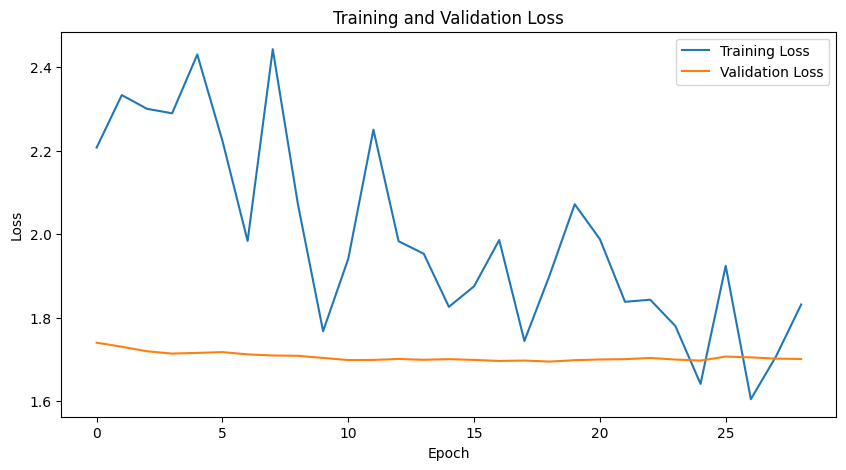

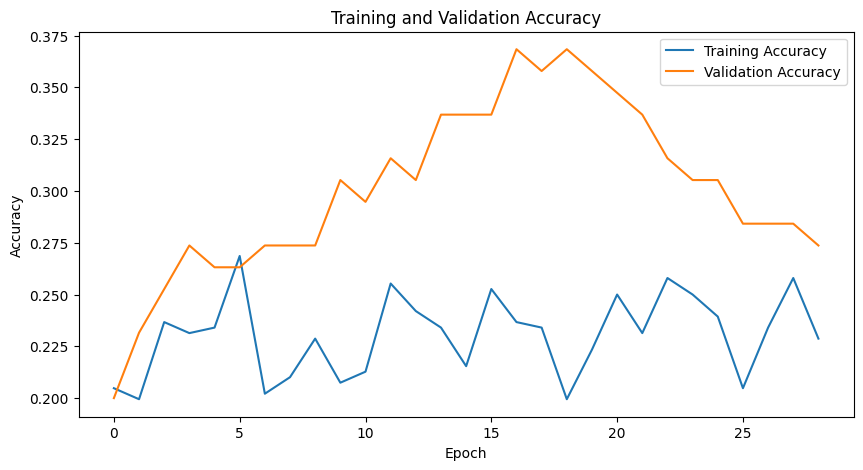

In [73]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [74]:
from sklearn.metrics import classification_report

# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
                        precision    recall  f1-score   support

         0=Blood Donor       0.91      0.19      0.31       105
0s=suspect Blood Donor       0.00      0.00      0.00         1
           1=Hepatitis       0.00      0.00      0.00         4
            2=Fibrosis       0.00      0.00      0.00         3
           3=Cirrhosis       0.10      0.40      0.15         5

              accuracy                           0.19       118
             macro avg       0.20      0.12      0.09       118
          weighted avg       0.81      0.19      0.29       118



In [75]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np


In [76]:
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(y_train_oh.shape[1], activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [77]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, test_index in kfold.split(X_train_scaled):
    # Split data
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_val_fold = y_train_oh[train_index], y_train_oh[test_index]

    # Buat dan latih model
    model = create_model()
    model.fit(X_train_fold, y_train_fold,
              epochs=50,
              batch_size=10,
              validation_data=(X_val_fold, y_val_fold),
              class_weight=class_weights_dict,
              callbacks=[early_stopping],
              verbose=0)  # verbose=0 untuk tidak menampilkan output pelatihan

    # Evaluasi model pada fold saat ini
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(val_accuracy)

print(f"Cross-Validation Accuracy per Fold: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation Accuracy per Fold: [0.8947368264198303, 0.6808510422706604, 0.6063829660415649, 0.5106382966041565, 0.3085106313228607]
Mean Cross-Validation Accuracy: 0.6002


## Melakukan Penyederhanaan Pada Arsitektur

Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


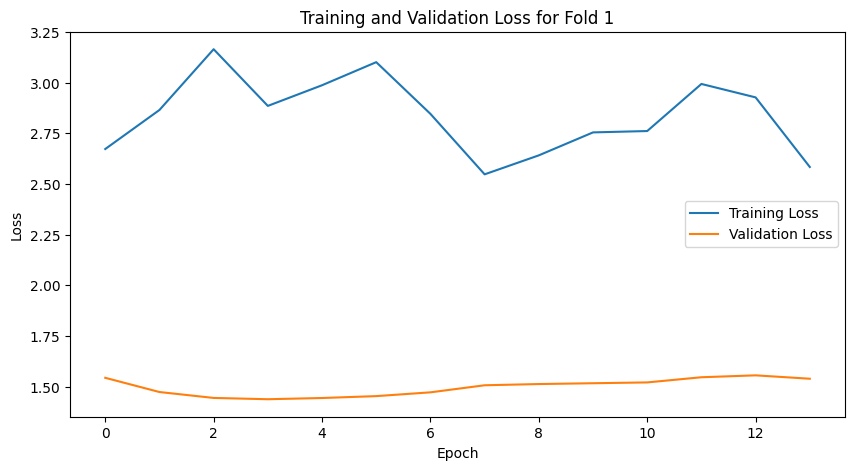

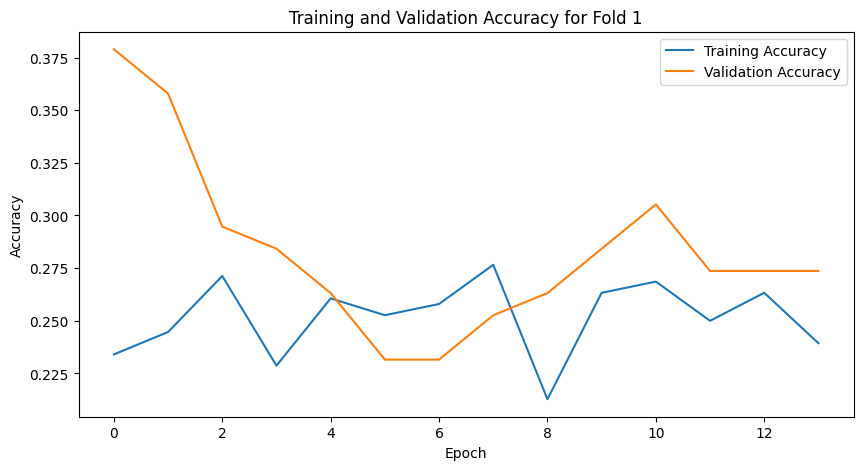

Training fold 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


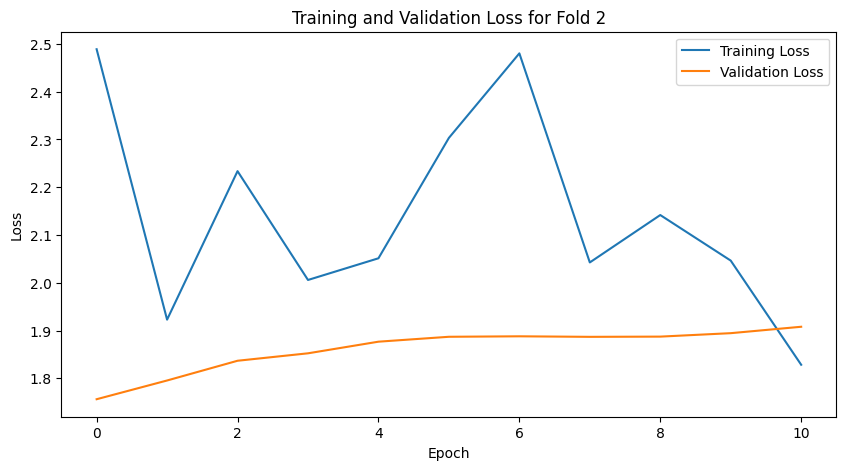

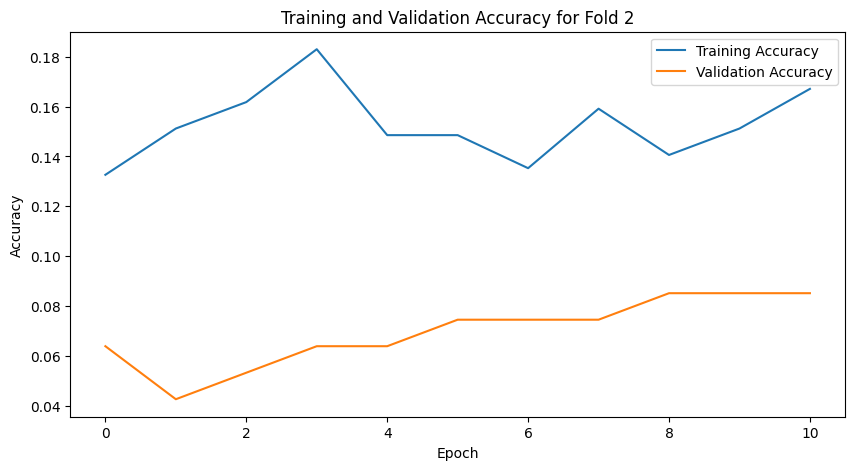

Training fold 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


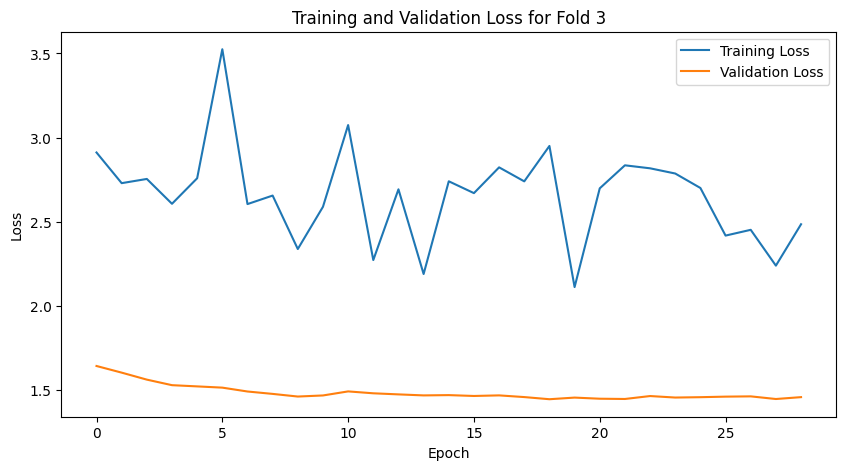

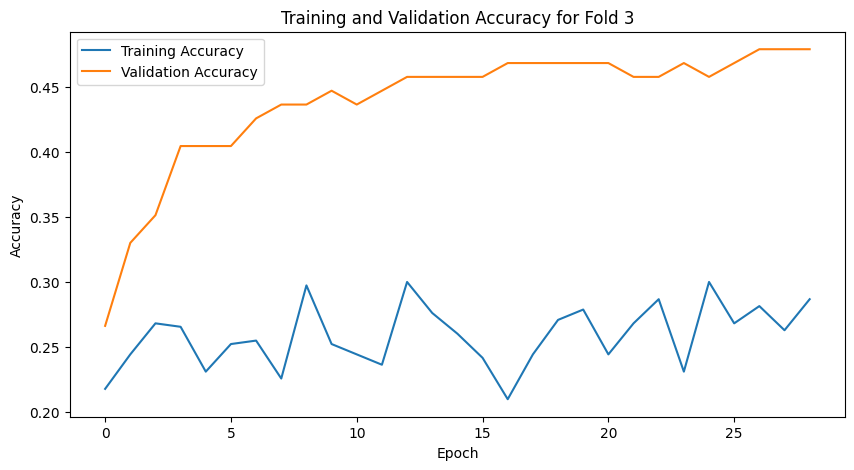

Training fold 4...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


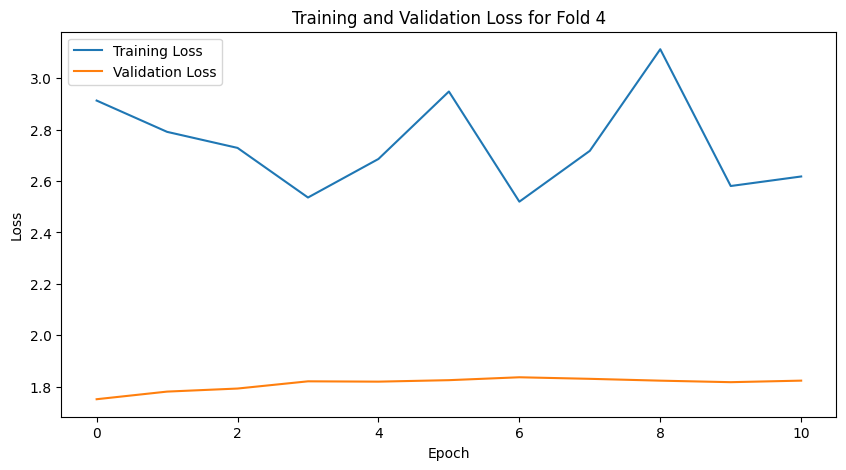

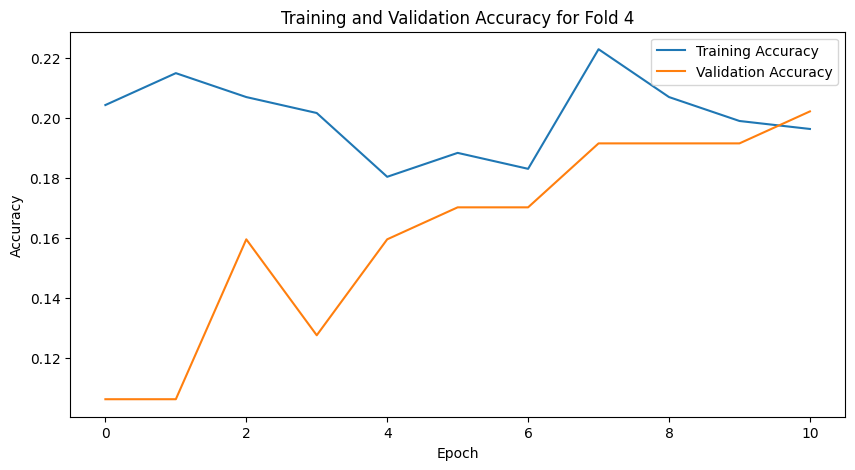

Training fold 5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


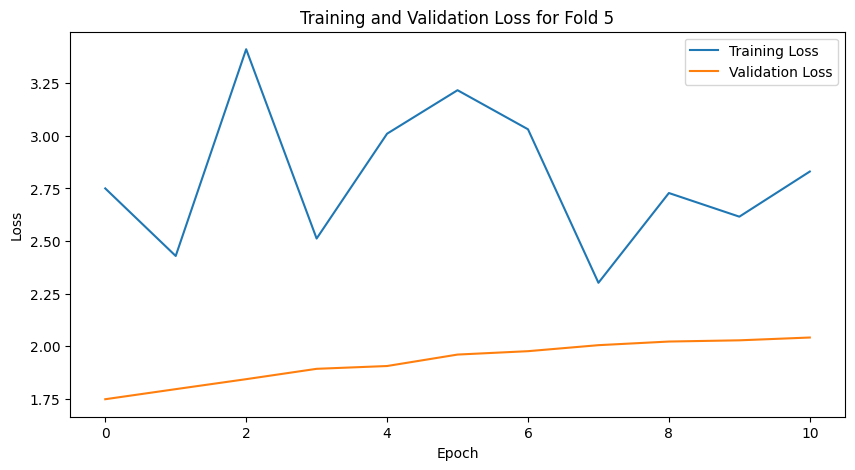

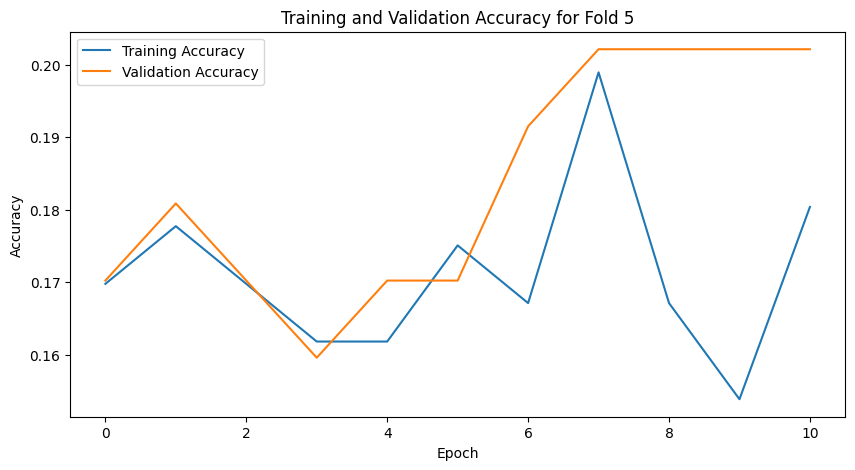

Cross-Validation Accuracy per Fold: [0.28421053290367126, 0.06382978707551956, 0.4680851101875305, 0.10638298094272614, 0.1702127605676651]
Mean Cross-Validation Accuracy: 0.2185


In [84]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Definisikan fungsi untuk membuat model ANN
def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(y_train_oh.shape[1], activation='softmax'))

    optimizer = Adam(learning_rate=0.00005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Inisialisasi KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
fold_no = 1

# Mulai cross-validation
for train_index, val_index in kfold.split(X_train_scaled):
    print(f'Training fold {fold_no}...')

    # Split data menjadi train dan validation set untuk fold ini
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train_oh[train_index], y_train_oh[val_index]

    # Hitung class weights untuk fold ini
    class_weights_dict = class_weight.compute_class_weight('balanced',
                                                           classes=np.unique(y_train_fold.argmax(axis=1)),
                                                           y=y_train_fold.argmax(axis=1))
    class_weights_dict = dict(enumerate(class_weights_dict))

    # Buat dan latih model
    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train_fold, y_train_fold,
                        epochs=50,
                        batch_size=10,
                        validation_data=(X_val_fold, y_val_fold),
                        class_weight=class_weights_dict,
                        callbacks=[early_stopping],
                        verbose=0)  # verbose=0 untuk tidak menampilkan output pelatihan

    # Evaluasi model pada fold saat ini
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(val_accuracy)

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for Fold {fold_no}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for Fold {fold_no}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    fold_no += 1

# Tampilkan hasil cross-validation
print(f"Cross-Validation Accuracy per Fold: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")


## Penggunaan Arsitektur ANN Lain

In [85]:
def create_shallow_model():
    model = Sequential()
    model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(y_train_oh.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [86]:
def create_deep_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(y_train_oh.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [87]:
from tensorflow.keras.layers import Conv2D, Flatten, LSTM, TimeDistributed

def create_hybrid_model():
    model = Sequential()
    # Bagian Convolutional (misalnya untuk gambar)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Flatten())

    # Bagian Dense
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    # Bagian Recurrent (misalnya untuk data urutan)
    model.add(Reshape((1, 64)))  # Mengubah data menjadi urutan tunggal
    model.add(LSTM(32, activation='relu'))

    # Output layer
    model.add(Dense(y_train_oh.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
